# This is the data labeler - everything that has to do with image labels is done here. This includes:
<ul>
    <li>(Partly) labelling the initial data using Pidgey (the individual image tagging happens over PhotoTagger) - <font color='red'>Cells 5-10 are not supposed to run correctly, because the the pidgey import is commented out</font></li>
    <li>Copying initial images into corresponding "Use", "Exclude" and "Not sure" folders</li>
    <li>Writing an initial sort out file, containing a list of every image and its corresponding folder</li>
    <li>Renaming images according to their id</li>
    <li>Plotting data after it has been labelled - according to its tags:
        <ul>
            <li>Bar plot - All tags</li>
            <li>Heatmap - Only important tags of binary categories: Environent, Sun visibility, Cloud visibility</li>
        </ul>
    </li>        
</ul>

In [6]:
#from pigeon import annotate #This is a comment because else the annotation process would run and takes a very long time to completet
from os import listdir, rename
from os.path import isfile, join
import random
from IPython.display import display, Image
from shutil import copyfile
import utils

In [7]:
imagesPath = 'D:/Documents/Uni Kurse/Bachelorarbeit/CC Crawler/images'

def listFiles(path):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    return onlyfiles

def getImageIds(imageNameList):
    imageIds = [int(imageName.split('_')[0]) for imageName in imageNameList]
    return imageIds

def getImageIdFromName(imageName):
    return int(imageName.split('_')[0])

def sortImageNamesById(imageNameList):
    imageIds = getImageIds(imageNameList)
    toSort = [(i, name) for i,name in zip(imageIds, imageNameList)] #Create a list of tuples of type: [(0, '0_xxx_xxx_xxx.jpg), (1, '2_xxx_xxx_xxx.jpg), ...]
    res = [pair[1] for pair in sorted(toSort, key = lambda pair:pair[0])]
    return res

In [8]:
imageNames = listFiles(imagesPath)
imageNames = sortImageNamesById(imageNames)
imagePaths = [imagesPath + "/" + name for name in imageNames]
imageIds = getImageIds(imageNames)

In [9]:
#Check if everything went smooth
print("Same length:",len(imageNames) == len(imagePaths) == len(imageIds))
rId = random.randint(0, len(imageNames))
print("Same random id:",int(imageNames[rId].split('_')[0]) == imageIds[rId])
imageNames[rId], rId

Same length: True
Same random id: True


('279_15644973102_c208971bff_o.jpg', 279)

In [10]:
annotationsUsablePictures = annotate(
#   ['I love this movie', 'I was really disappointed by the book'],
    imagePaths,
  options=["Use", "Exclude", "Not sure"],
    display_fn=lambda filename: display(Image(filename))
)

NameError: name 'annotate' is not defined

In [11]:
annotationsUsablePictures

NameError: name 'annotationsUsablePictures' is not defined

In [12]:
def calcStats(annotationsList):
    categories = []
    categoryCounters = []
    for entry in annotationsList:
        cat = entry[1]
        if (cat not in categories):
            categories.append(cat)
            newCounter = 1
            categoryCounters.append(newCounter)
        else:
            i = categories.index(cat)
            categoryCounters[i]+=1
    for category, counter in zip(categories, categoryCounters):
        print("Category:",category, "- Amount of pictures:", counter)
    print("Total pictures rated:", sum(categoryCounters))
    return (categories, categoryCounters)

In [13]:
calcStats(annotationsUsablePictures)

NameError: name 'annotationsUsablePictures' is not defined

In [ ]:
def changeEntry(entries, eId, newCat):
    entry = entries[eId]
    if entry[1] == newCat:
        print('Category is already',newCat)
        print(entry)
        return
    path = entry[0]
    newEntry = (path, newCat)
    print("Old entry:",entry)
    print("New entry:", newEntry)
    entries[eId] = newEntry

In [14]:
toChange = [55, 207, 246, 274, 490]
for i in toChange:
    changeEntry(annotationsUsablePictures,i,"Not sure")
annotationsUsablePictures[490]
# changeEntry(annotationsUsablePictures,630,"Use")
# annotationsUsablePictures[620:640]


NameError: name 'changeEntry' is not defined

In [ ]:
# changeEntry(annotationsUsablePictures,247,"Use")

In [ ]:
def writeFirstSortOut(annotationsUsablePictures):
    output_firstSortOut = open("firstSortOut.txt", 'w')#, encoding='utf-8')
    header = "imageId;category;imagePath\n"
    output_firstSortOut.write(header)
    for entry in annotationsUsablePictures:
        imPath = entry[0]
        imId = getImageIdFromName(imPath.split('/')[-1])
        category = entry[1]
        line = f"{imId};{category};{imPath}\n"
        output_firstSortOut.write(line)
    output_firstSortOut.close()

In [15]:
# writeFirstSortOut(annotationsUsablePictures)

### Copy images to corresponding Category Folders

In [16]:
def copyToLabelFolders(entries, path = 'D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/taggedImages/'):
    categories = calcStats(entries)[0]
    categoryPaths = [path+cat for cat in categories]
    copyStats = {
        'Use': 0,
        'Exclude': 0,
        'Not sure': 0
    }
    for entry in entries:
        originalPath = entry[0]
        category = entry[1]
        catIndex = categories.index(category)
        catPath = categoryPaths[catIndex]
        imName = originalPath.split('/')[-1]
        newPath = catPath + "/" + imName
        copyfile(originalPath, newPath)
        copyStats[category] += 1
    print("Successfully copied:")
    print(copyStats)
    
'''
Receives list of image names in form of 'ID_NAME_[,tags,].jpg'
'''
def copyToCategoryFolders(imageNames,sourcePath = "D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/taggedImages/Use/", savePath = 'D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/final_images/'):
    #Define our categories
    env = [',beach',',landscape'] #Environment Type
    sun = [',visiblesun',',invisiblesun'] #Sun Type
    clouds = [',yesclouds',',noclouds'] #Cloud Type
    #Loop
    for e in env:
        for s in sun:
            for c in clouds:
                #Define the filter lambda
                l = lambda imName : e in imName and s in imName and c in imName
                
                #Print current image category
                printText = f"\n************\n{e[1:]} - {s[1:]} - {c[1:]}:\n"
                print(printText)
                
                #Filter the images that satisfy the search criteria
                batch = list(filter(l,imageNames)) #Filter all images with the given parameters
                
                #Create the folder name
                folderName = '_'.join([e[1:],s[1:],c[1:]]) + '/'
                
                #Copy the images to the appropriate folders
                for imName in batch:
                    oldPath = sourcePath + imName
                    newPath = savePath + folderName + imName
                    print(f"Copying: {oldPath}")
                    print(f"To: {newPath}")
                    utils.createFolderIfNeeded(savePath+folderName)
                    copyfile(oldPath,newPath)
    
    

In [17]:
#Gather all image names and sort them by id
taggedImagesPath = "D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/taggedImages/Use/"
taggedImagesNames = listFiles(taggedImagesPath)
taggedImagesNames = sortImageNamesById(taggedImagesNames)

myImagesPath = "D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/my_images/"
myImagesNames = listFiles(myImagesPath)
myImagesNames = sortImageNamesById(myImagesNames)

extraImagesPath = "D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/extra_images/"
extraImagesNames = listFiles(extraImagesPath)
extraImagesNames = sortImageNamesById(extraImagesNames)

In [18]:
#Execute the function per source folder
# copyToCategoryFolders(taggedImagesNames,taggedImagesPath)
# copyToCategoryFolders(myImagesNames, myImagesPath)
# copyToCategoryFolders(extraImagesNames, extraImagesPath)

In [19]:
test = 12.123456
print(f"{test:07.3f}")

012.123


### The next cell is to properly id and rename the my_images images

In [20]:
# #Get the last known id from our existing images
# lastId = max(imageIds)
# my_im_currentId = lastId + 1
# # rename('file path/OLD file name.file type','file path/NEW file name.file type')
# my_images_names = listFiles(r"D:\Documents\Uni Kurse\Bachelorarbeit\Labeler\my_images")
# my_images_new_names = []
# for i, p in enumerate(my_images_names):
#     newName = str(my_im_currentId) + "_" + p
#     my_images_new_names.append(newName)
#     my_im_currentId += 1
# myPath = "D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/my_images/"
# for old,new in zip(my_images_names, my_images_new_names):
# #     print("renaming", myPath + old, "to", myPath + new)
#     rename(myPath + old, myPath + new)

# From this point on we working with image statistics

In [21]:
def getTags(nameList):
    tags = []
    for name in nameList:
        nameTags = name.split('_')[-1].split('.')[0] #Drop extension
        if (nameTags[:2] != "[," and nameTags[-2:] != ",]"):
            print(name,"exclude")
            continue
        nameTags = nameTags[2:-2].split(',') #Remove [, and ,]
        for tag in nameTags:
            if tag not in tags:
                tags.append(tag)
    return tags
        

def getStatsFromNames(path):
    names = listFiles(path)
    names = sortImageNamesById(names)
    tags = getTags(names)
    print("Tags:",tags)
    tagCounters = dict()
    tagCounters['exclude'] = 0
    tagCounters['n'] = 0 #To count distinct pictures
    for tag in tags:
        tagCounters[tag] = 0
    for name in names:
        tagCounters['n']+=1
        imageTags = name.split('_')[-1].split('.')[0] #Drop extension
        imageTags = imageTags[2:-2].split(',')
        if '' in imageTags:
            tagCounters['exclude']+=1
            continue
        for tag in imageTags:
            tagCounters[tag] += 1
    return tagCounters

##### Check if method is working properly

In [22]:
getTags(["_makanga_[,testTag1,testTag2,]"])

['testTag1', 'testTag2']

## Get the stats

In [23]:
stats = getStatsFromNames("D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/taggedImages/Use")
myStats = getStatsFromNames("D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/my_images")
extraStats = getStatsFromNames("D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/extra_images")
stats, myStats, extraStats

226_6294890147_a9414f6226_o.jpg exclude
227_6295421410_4dca81fa4a_o.jpg exclude
252_6295404910_2f1f4e3f3f_o.jpg exclude
348_49322254096_1bebf310a6_o.jpg exclude
351_37489258171_1f860cc8ae_o.jpg exclude
Tags: ['use', 'beach', 'visiblesun', 'mediumclouds', 'noclouds', 'yesclouds', 'landscape', 'invisiblesun', 'watermark', 'obstructedview', 'lake', 'badquality', 'heavilyedited', 'city', 'needsedit', 'peoplevisible', 'buildingvisible']
Tags: ['use', 'city', 'invisiblesun', 'yesclouds', 'landscape', 'visiblesun', 'beach', 'noclouds', 'mediumclouds', 'lake']
Tags: ['use', 'landscape', 'invisiblesun', 'noclouds', 'badquality', 'beach', 'visiblesun']


({'exclude': 5,
  'n': 293,
  'use': 288,
  'beach': 154,
  'visiblesun': 140,
  'mediumclouds': 8,
  'noclouds': 38,
  'yesclouds': 241,
  'landscape': 109,
  'invisiblesun': 148,
  'watermark': 17,
  'obstructedview': 30,
  'lake': 30,
  'badquality': 3,
  'heavilyedited': 7,
  'city': 27,
  'needsedit': 14,
  'peoplevisible': 12,
  'buildingvisible': 6},
 {'exclude': 0,
  'n': 42,
  'use': 42,
  'city': 8,
  'invisiblesun': 21,
  'yesclouds': 11,
  'landscape': 7,
  'visiblesun': 21,
  'beach': 27,
  'noclouds': 25,
  'mediumclouds': 6,
  'lake': 2},
 {'exclude': 0,
  'n': 10,
  'use': 10,
  'landscape': 9,
  'invisiblesun': 6,
  'noclouds': 10,
  'badquality': 3,
  'beach': 1,
  'visiblesun': 4})

## Merge the stats

In [24]:
allStats = dict()
for tag in stats.keys():
    allStats[tag] = stats[tag]
for tag in myStats.keys():
    allStats[tag] += myStats[tag]
for tag in extraStats.keys():
    allStats[tag] += extraStats[tag]
allStats

{'exclude': 5,
 'n': 345,
 'use': 340,
 'beach': 182,
 'visiblesun': 165,
 'mediumclouds': 14,
 'noclouds': 73,
 'yesclouds': 252,
 'landscape': 125,
 'invisiblesun': 175,
 'watermark': 17,
 'obstructedview': 30,
 'lake': 32,
 'badquality': 6,
 'heavilyedited': 7,
 'city': 35,
 'needsedit': 14,
 'peoplevisible': 12,
 'buildingvisible': 6}

## Plot the data

In [25]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns
import pandas
%matplotlib inline

### Plot all labels into one big bar plot

In [26]:
x = list(allStats.keys())[3:]
y = list(allStats.values())[3:]
tuples = []
for x0,y0 in zip(x,y):
    tuples.append(tuple([x0,y0]))
tuples = sorted(tuples,key=lambda e: e[1], reverse=True)

tagCategories = {
    'environment' : ['beach','landscape','city','lake'],
    'sun_visibility' : ['invisiblesun','visiblesun'],
    'cloud_visibility' : ['yesclouds','noclouds','mediumclouds'],
    'parameters' : ['obstructedview','watermark','needsedit','peoplevisible','heavilyedited','buildingvisible','badquality']
}

categoryColors = {
    'environment' : 'red',
    'sun_visibility' : 'orange',
    'cloud_visibility' : 'gray',
    'parameters' : 'green'
}


def splitTuplesByCategory(cats, tuples):
    res = dict()
    for cat in cats.keys():
        res[cat] = []
        for t in tuples:
            if (t[0] in cats[cat]):
                res[cat].append(t)
    return res
            
tupsByCat = splitTuplesByCategory(tagCategories, tuples)
tuples, len(tuples), tupsByCat

([('yesclouds', 252),
  ('beach', 182),
  ('invisiblesun', 175),
  ('visiblesun', 165),
  ('landscape', 125),
  ('noclouds', 73),
  ('city', 35),
  ('lake', 32),
  ('obstructedview', 30),
  ('watermark', 17),
  ('mediumclouds', 14),
  ('needsedit', 14),
  ('peoplevisible', 12),
  ('heavilyedited', 7),
  ('badquality', 6),
  ('buildingvisible', 6)],
 16,
 {'environment': [('beach', 182),
   ('landscape', 125),
   ('city', 35),
   ('lake', 32)],
  'sun_visibility': [('invisiblesun', 175), ('visiblesun', 165)],
  'cloud_visibility': [('yesclouds', 252),
   ('noclouds', 73),
   ('mediumclouds', 14)],
  'parameters': [('obstructedview', 30),
   ('watermark', 17),
   ('needsedit', 14),
   ('peoplevisible', 12),
   ('heavilyedited', 7),
   ('badquality', 6),
   ('buildingvisible', 6)]})

<ipython-input-27-5e2fb33af9b1>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


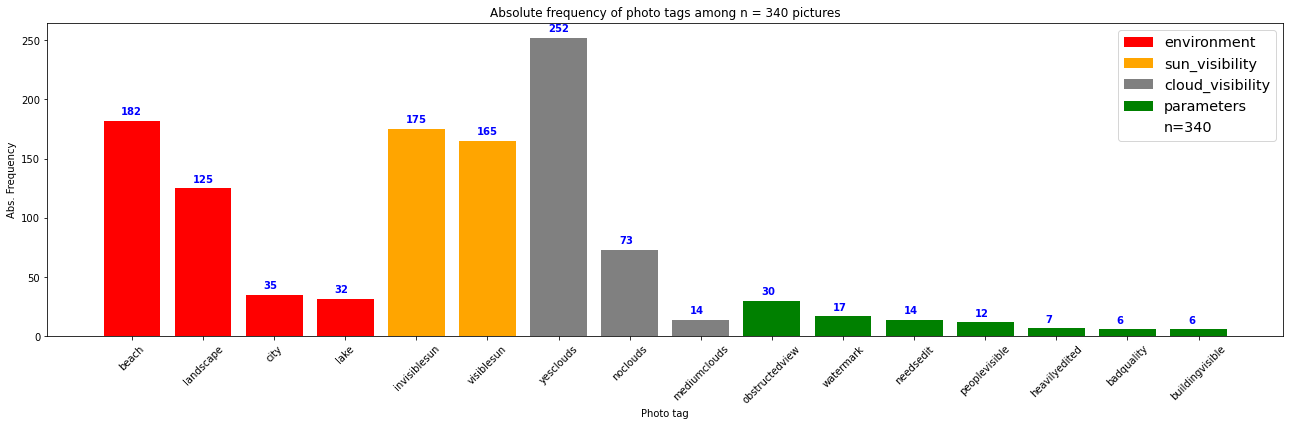

In [27]:
#Create the figure
fig= plt.figure(figsize=(18,6))
#ax = plt.gca() #Get current ax
#plt.bar(tuples)
#plt.xticks(rotation=45)
# plt.bar(['sex','pepe'],[1,4])

#i counts the current bar index 
i=0
n = allStats['use']
#Plot the data
for cat,tups in zip(tupsByCat.keys(),tupsByCat.values()):
    xs = [t[0] for t in tups]
    ys = [t[1] for t in tups]
    col = categoryColors[cat]
    plt.bar(xs, ys, color = col, label=cat)
    #Add the precise number of elements above the i-th plot
    for v in ys:
        plt.text(i-0.15,v+5, str(v), color='blue', fontweight='bold')
        i+=1
#Plot an empty bar in order to add n to the legend
plt.bar(0,0, color='purple', label=f'n={n}',alpha=0)
# plt.bar(range(len(tuples)), [val[1] for val in tuples], align='center')
# plt.xticks(range(len(tuples)), [val[0] for val in tuples])
plt.xticks(rotation=45)
plt.ylabel("Abs. Frequency")
plt.xlabel("Photo tag")
plt.legend(fontsize='x-large')
plt.title(f"Absolute frequency of photo tags among n = {n} pictures")
plt.tight_layout(pad=1)
fig.show()

In [28]:
#Save the figure
# fig.savefig('testplot3.jpg',dpi=150)
# Image.open('testplot.png').save('testplot.jpg','JPEG')

### Plot relevant data into a 2-D heatmap

In [29]:
#List all known filenames
taggedImagesNames = listFiles("D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/taggedImages/Use")
myImagesNames = listFiles("D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/my_images")
extraImagesNames = listFiles("D:/Documents/Uni Kurse/Bachelorarbeit/Labeler/extra_images")
allNames = taggedImagesNames + myImagesNames + extraImagesNames
#Sort the filenames by id
allNames = sortImageNamesById(allNames)
#Create binary categories
#Note: the ',' before the category name is to make sure the category starts with this name 
#E.g.: visiblesun is contained in invisiblesun
c1 = [',beach',',landscape'] #Environment Type
c2 = [',visiblesun',',invisiblesun'] #Sun Type
c3 = [',yesclouds',',noclouds']#,',mediumclouds'] #Cloud Type
#Create the data aray for beach
db = np.empty((2,2),dtype=int)
#Create the data array for landscape
dl = np.empty((2,2),dtype=int)
#Put those into one list for usability
d = [db,dl]
#Count the entries with nChecker to make sure numbers add up and neutralize labelling errors in case they don't
nChecker = 0
print("******* Results: *******")
#Iterate over the environment
for e, env in enumerate(c1):
    #Iterate over the sun type
    for i, sun in enumerate(c2):
        #Iterate over the cloud type
        for j, clouds in enumerate(c3):
            #Filter out all lists that belong to current group of parameters
            l = lambda n : env in n and sun in n and clouds in n
            testResult = list(filter(l,allNames))
            #The string containing result data
            sRes = f"{env}{sun}{clouds}"
            sRes = sRes[1:] #Drop the first ','
            #Fetch the amount of entries satisfying the current parameters
            countRes = len(testResult)
            #Add that amount to n
            nChecker+=countRes
            #Update the corresponding data array with the found n
            d[e][i,j] = countRes
            print(f"{sRes:32s}",":",countRes) #String formatting

#The rest of this cell is for debugging purposes
print("\n******* Debugging output starts here: *******")
# l = lambda n : 'landscape' in n and 'invisiblesun' in n and 'noclouds' in n
# # l = lambda n : 'beach' in n and ',invisiblesun' in n and ',visiblesun' in n
# testRes1 = list(filter(l, allNames))
print('n:',nChecker)
# print(len(testRes1))
#print(testRes1)
# print(d[0])
# print(d[1])

******* Results: *******
beach,visiblesun,yesclouds       : 66
beach,visiblesun,noclouds        : 33
beach,invisiblesun,yesclouds     : 64
beach,invisiblesun,noclouds      : 10
landscape,visiblesun,yesclouds   : 33
landscape,visiblesun,noclouds    : 12
landscape,invisiblesun,yesclouds : 66
landscape,invisiblesun,noclouds  : 11

******* Debugging output starts here: *******
n: 295


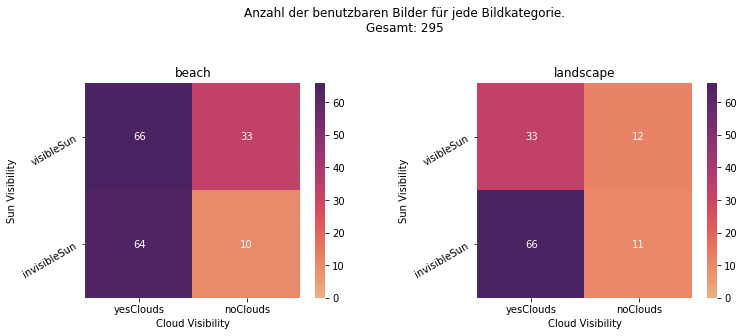

In [30]:
# vmin=np.min(d)
#Specify the min and max values for the color bar
vmin=0
vmax=np.max(d)
#Create the figure with 2 subplots
fig2, axes = plt.subplots(ncols=2,figsize=(12,5.5))
fig2.subplots_adjust(hspace=10)
fig2.tight_layout(pad=8)
fig2.suptitle(f"Anzahl der benutzbaren Bilder für jede Bildkategorie.\nGesamt: {nChecker}")
#Plot the data
for e, ax in enumerate(axes):
    #Create a dataFrame based on the current data matrix
#     dataset = pandas.DataFrame(data=d[e], index=['visibleSun','invisibleSun'], columns=['yesClouds','noClouds'])
    #Plot the heatmap on the ax
    ax = sns.heatmap(d[e], ax=ax, annot=True, fmt='d', square=True,vmin=vmin,vmax=vmax,cmap='flare')#,cbar_kws={"shrink": 0.53})
    #Specify the labels
    ax.set_yticklabels(['visibleSun','invisibleSun'], rotation=30)
    ax.set_xticklabels(['yesClouds','noClouds'])
    ax.set_title(c1[e][1:])
    ax.set_ylabel("Sun Visibility")
    ax.set_xlabel("Cloud Visibility")
#Save the figure
#fig2.savefig('Heatmap_allImages.jpg', dpi=150)